# Установим необходимые инструменты

In [363]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

from IPython.display import Image

import pickle

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [385]:
DATASET_PATH = './HepatitisCdata.csv'
PREPARED_DATASET_PATH = './HepatitisCdata_prepared.csv'

REPORTS_FILE_PATH = './reports/'
SCALER_FILE_PATH = './scaler.pkl'
MODEL_FILE_PATH = './model.pkl'

# Загрузим датасет

Ссылка на датасет: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset

Цель работы: изучение связи наличия гепатита С и различных показателей анализа крови. Рассматривали доноров крови, потенциальных доноров, а также больных гепатитом (с "просто наличием", фиброзом и циррозом печени).

Описание исходных признаков:

X (Patient ID/No.) (идентификатор участника опыта);
Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis') (категрия: '0=Донор крови', '0s=ожидаемый донор крови', '1=есть гепатит', '2=есть гепатит, фиброз печени', '3=есть гепатит, цирроз печени');
Age (in years) (возраст, лет);
Sex (f,m) (пол: ж, м);
ALB (альбумин);
ALP (щелочная фосфатаза);
ALT (аланинаминотрасфераза);
AST (аспартатаминотрансфераза);
BIL (билирубин общий);
CHE (холинэстераза);
CHOL (холестерол);
CREA (креатинин);
GGT (гамма-глютамилтранспептидаза);
PROT (белок общий).

# Проведем предварительную обработку данных

In [270]:
df = pd.read_csv('C://Users//romal//Desktop//HepatitisCdata.csv', sep=',')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [271]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [272]:
df.sample()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
523,524,0=Blood Donor,62,f,35.4,59.7,21.2,24.7,3.3,9.0,7.45,59.0,17.7,65.4


In [273]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [274]:
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [275]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Проверим массив на дубликаты.

In [276]:
dup = df[df.duplicated()].shape[0]
print(f"Нашлось {dup} дубликатов среди {df.shape[0]} вхождений датасета.")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nПосле удаления дубликатов осталось {df.shape[0]} вхождений датасета.")

Нашлось 0 дубликатов среди 615 вхождений датасета.

После удаления дубликатов осталось 615 вхождений датасета.


Если есть пустоты, заменим их на медианы.

In [277]:
medians = df[['Age', 'ALB', 'ALP', 'ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']].median()
medians

Age     47.00
ALB     41.95
ALP     66.20
ALT     23.00
AST     25.90
BIL      7.30
CHE      8.26
CHOL     5.30
CREA    77.00
GGT     23.30
PROT    72.20
dtype: float64

In [278]:
df[['Age', 'ALB', 'ALP', 'ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']] = \
        df[['Age', 'ALB', 'ALP', 'ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']].fillna(medians)

In [279]:
df.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

Удалим столбец с индексами.

In [280]:
df.drop(columns='Unnamed: 0', inplace=True)

In [281]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [282]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Давайте обсудим максимумы. Возраст вполне человеческий, не трогаем. ALB по диссертации Морозовой (https://med.ru/sites/default/files/docs/Disser_Morozova.pdf), например, при болезнях печени доходил до 67,7, тут - 82,2, допустимо, я думаю. ALP по Морозовой до 319,0, у нас многовато, давайте обрежем по 350,0. ALT по Морозовой и повыше был, оставляем этот. AST по Морозовой до 290,0 доходил, тут сойдет, я думаю. BIL общий по Морозовой - до 136,0, у нас многовато, давайте до 150,0. CHE и CHOL, думаю, оставим. CREA и GGT очень сильно максимум отъехал, давайте потом по квантилям обрежем. PROT пойдет.

А теперь обсудим минимумы. ALB в пожилом возрасте доходит до минимума 32,0 где-то, у нас мало, обрежем по 30,0. ALP у нас маловат, обрезать бы по 40,0. ALT обрежем по 25,0. AST - по 20,0. BIL может быть и 0, ок. CHE обрежем по 5,0. CHOL обрежем по 4,0. PROT - по 60.

In [283]:
df.loc[(df['ALB'] < 30), 'ALB'] = df['ALB'].median()

In [284]:
df.loc[(df['ALP'] < 40) | (df['ALP'] > 350), 'ALP'] = df['ALP'].median()

In [285]:
df.loc[(df['ALT'] < 25), 'ALT'] = df['ALT'].median()

In [286]:
df.loc[(df['AST'] < 20), 'AST'] = df['AST'].median()

In [287]:
df.loc[(df['BIL'] > 150), 'BIL'] = df['BIL'].median()

In [288]:
df.loc[(df['CHE'] < 5), 'CHE'] = df['CHE'].median()

In [289]:
df.loc[(df['CHOL'] < 4), 'CHOL'] = df['CHOL'].median()

In [290]:
df.loc[(df['PROT'] < 60), 'PROT'] = df['PROT'].median()

Обрежем CREA по квантилям.

In [291]:
df['CREA'].describe()

count     615.000000
mean       81.287805
std        49.756166
min         8.000000
25%        67.000000
50%        77.000000
75%        88.000000
max      1079.100000
Name: CREA, dtype: float64

In [292]:
CREA_max_value = np.quantile(df['CREA'], q=0.975)
CREA_max_value

112.0

In [293]:
CREA_min_value = np.quantile(df['CREA'], q=0.025)
CREA_min_value

52.0

In [294]:
condition = (df['CREA'] > CREA_max_value) | (df['CREA'] < CREA_min_value)
df[condition]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
58,0=Blood Donor,37,m,44.80,94.3,32.2,36.7,6.3,9.76,4.12,113.0,23.8,72.5
118,0=Blood Donor,43,m,39.70,126.0,23.0,28.9,16.2,8.48,5.30,114.0,21.4,80.3
156,0=Blood Donor,46,m,45.90,80.1,67.5,36.7,2.9,8.73,4.68,113.0,50.1,68.8
185,0=Blood Donor,48,m,50.40,66.2,37.2,28.0,17.3,10.87,6.97,114.0,45.2,72.9
220,0=Blood Donor,52,m,37.20,73.6,28.9,29.8,6.6,6.80,4.94,8.0,24.1,64.2
233,0=Blood Donor,53,m,41.70,45.3,23.0,25.1,10.8,5.68,5.78,119.0,114.9,67.9
315,0=Blood Donor,76,m,41.95,48.9,25.2,27.2,8.3,8.26,5.30,127.0,18.3,72.2
329,0=Blood Donor,33,f,42.40,137.2,23.0,25.9,3.4,8.23,5.30,48.0,25.7,74.4
332,0=Blood Donor,33,f,38.50,82.2,23.0,25.9,7.3,7.23,5.30,50.0,7.0,73.3
388,0=Blood Donor,44,f,37.40,66.2,23.0,25.8,3.1,6.70,4.45,50.0,9.2,66.3


In [295]:
df.loc[condition, 'CREA'] = df['CREA'].median()
df['CREA'].describe()

count    615.000000
mean      78.032846
std       13.170596
min       52.000000
25%       68.000000
50%       77.000000
75%       87.000000
max      112.000000
Name: CREA, dtype: float64

Обрежем GGT по квантилям.

In [296]:
df['GGT'].describe()

count    615.000000
mean      39.533171
std       54.661071
min        4.500000
25%       15.700000
50%       23.300000
75%       40.200000
max      650.900000
Name: GGT, dtype: float64

In [297]:
GGT_max_value = np.quantile(df['GGT'], q=0.975)
GGT_max_value

156.5549999999999

In [298]:
GGT_min_value = np.quantile(df['GGT'], q=0.025)
GGT_min_value

9.0

In [299]:
condition = (df['GGT'] > GGT_max_value) | (df['GGT'] < GGT_min_value)
df[condition]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
13,0=Blood Donor,33,m,39.00,51.7,23.0,24.0,6.8,6.46,5.30,65.0,7.0,70.4
205,0=Blood Donor,50,m,42.20,145.0,27.5,37.9,4.5,13.71,8.80,103.0,239.0,73.1
245,0=Blood Donor,55,m,40.00,44.9,23.0,25.9,2.6,5.98,4.55,71.0,8.8,66.3
260,0=Blood Donor,57,m,43.50,56.2,60.4,37.3,7.3,6.79,5.99,110.0,185.2,71.8
318,0=Blood Donor,32,f,39.90,66.2,23.0,29.8,6.3,8.16,4.37,60.0,4.5,72.5
331,0=Blood Donor,33,f,35.40,53.5,23.0,25.9,3.8,6.00,4.48,78.0,8.0,71.5
332,0=Blood Donor,33,f,38.50,82.2,23.0,25.9,7.3,7.23,5.30,77.0,7.0,73.3
335,0=Blood Donor,34,f,37.30,66.2,23.0,28.7,3.8,8.26,4.94,86.0,4.9,70.7
358,0=Blood Donor,37,f,40.50,47.3,23.0,25.9,4.9,5.40,5.30,76.0,7.1,69.0
390,0=Blood Donor,44,f,35.50,60.0,23.0,25.9,9.1,6.71,5.29,64.0,7.4,65.2


In [300]:
df.loc[condition, 'GGT'] = df['GGT'].median()
df['GGT'].describe()

count    615.000000
mean      32.727154
std       26.371501
min        9.000000
25%       16.250000
50%       23.300000
75%       36.200000
max      153.500000
Name: GGT, dtype: float64

Тут минимум все равно плохо обрезался. Давайте обрежем вручную по 20,0, нашла в литературе такое мнение.

In [301]:
df.loc[(df['GGT'] < 20), 'GGT'] = df['GGT'].median()
df['GGT'].describe()

count    615.000000
mean      35.941951
std       24.363307
min       20.000000
25%       23.300000
50%       23.300000
75%       36.200000
max      153.500000
Name: GGT, dtype: float64

In [302]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,42.254634,70.030407,32.134472,36.228455,10.040976,8.517106,5.532033,78.032846,35.941951,72.551057
std,10.055105,4.699775,19.116685,23.530821,32.472057,10.487241,1.776638,0.944982,13.170596,24.363307,4.381687
min,19.000000,30.000000,40.300000,23.000000,20.000000,0.800000,5.020000,4.000000,52.000000,20.000000,60.500000
25%,39.000000,39.250000,58.300000,23.000000,24.600000,5.300000,7.260000,4.890000,68.000000,23.300000,69.900000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.100000,9.590000,6.055000,87.000000,36.200000,75.400000
max,77.000000,82.200000,208.200000,325.300000,324.000000,119.000000,16.410000,9.670000,112.000000,153.500000,90.000000


Применим дамми-метод к разделению по полу.

In [303]:
df['Sex']

0      m
1      m
2      m
3      m
4      m
      ..
610    f
611    f
612    f
613    f
614    f
Name: Sex, Length: 615, dtype: object

In [304]:
pd.get_dummies(df['Sex'])

,f,m
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
610,1,0
611,1,0
612,1,0
613,1,0


In [305]:
df = pd.concat([df, pd.get_dummies(df['Sex'])], axis=1)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,f,m
0,0=Blood Donor,32,m,38.5,52.5,23.0,22.1,7.5,6.93,5.30,106.0,23.3,69.0,0,1
1,0=Blood Donor,32,m,38.5,70.3,23.0,24.7,3.9,11.17,4.80,74.0,23.3,76.5,0,1
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1


In [306]:
df.drop(columns='Sex', inplace=True)

In [307]:
df.columns

Index(['Category', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL',
       'CREA', 'GGT', 'PROT', 'f', 'm'],
      dtype='object')

Рассмотрим разделение выборки в целом по полу.

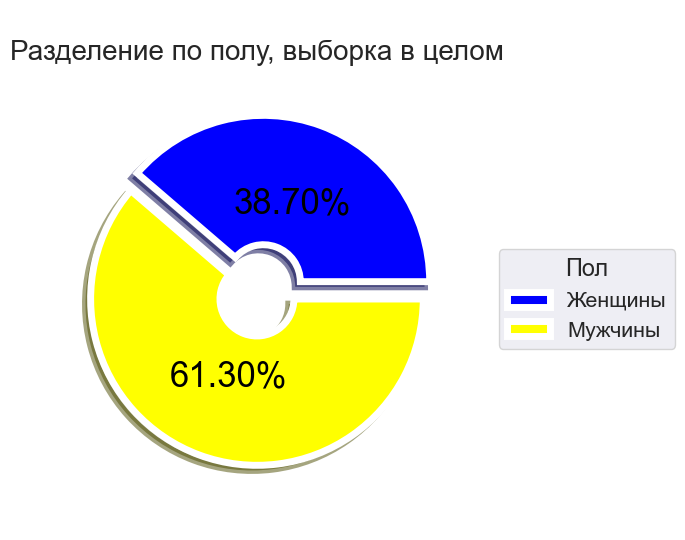

In [308]:
plt.subplots(figsize=(6, 6))

labels = "Женщины","Мужчины"
size = 0.7

wedges, texts, autotexts = plt.pie([len(df[df["f"] == 1]["f"]),
                                    len(df[df["m"]== 1]["m"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["blue","yellow"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Пол",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nРазделение по полу, выборка в целом",fontsize=20)
plt.show()

Выделим, сколько в группе реальных доноров крови.

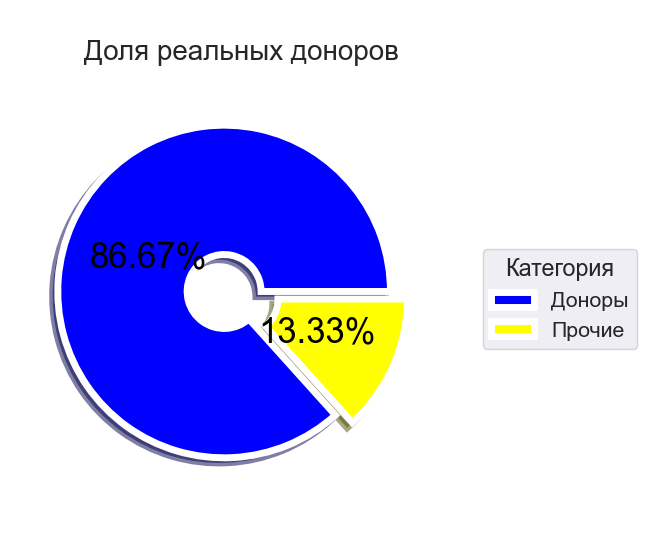

In [309]:
plt.subplots(figsize=(6, 6))

labels = "Доноры","Прочие"
size = 0.7

wedges, texts, autotexts = plt.pie([len(df[df["Category"] == "0=Blood Donor"]["Category"]),
                                    len(df[df["Category"] != "0=Blood Donor"]["Category"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["blue","yellow"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Категория",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nДоля реальных доноров",fontsize=20)
plt.show()

Рассмотрим группу с гепатитом: как распределены разные его формы.

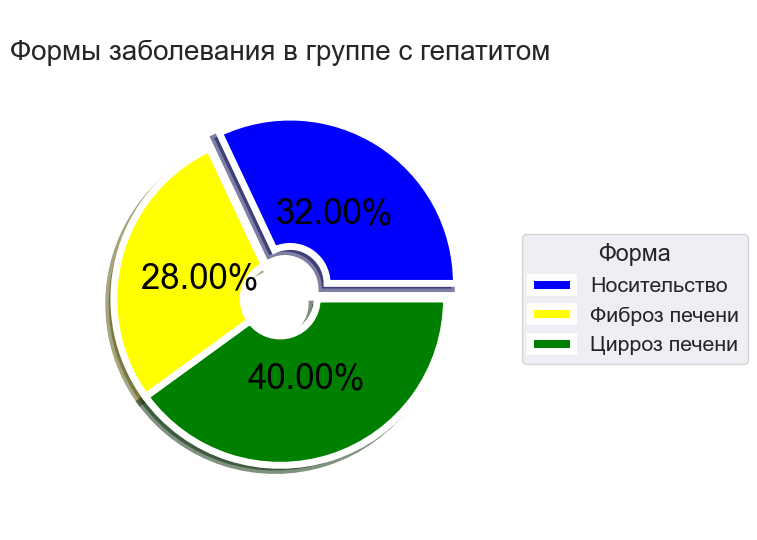

In [310]:
plt.subplots(figsize=(6, 6))

labels = "Носительство","Фиброз печени","Цирроз печени"
size = 0.7

wedges, texts, autotexts = plt.pie([len(df[df["Category"] == "1=Hepatitis"]["Category"]),
                                    len(df[df["Category"] == "2=Fibrosis"]["Category"]),
                                    len(df[df["Category"] == "3=Cirrhosis"]["Category"])],
                                    explode = (0.1,0,0),
                                    textprops=dict(size= 25, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["blue","yellow", "green"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Форма",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nФормы заболевания в группе с гепатитом",fontsize=20)
plt.show()

Объединим 3 категории, в которых есть больные гепатитом, в одну общую (Hep). Далее применим дамми-метод.

In [311]:
df["Category"] = df["Category"].replace({"1=Hepatitis" : "Hep", "2=Fibrosis" : "Hep", "3=Cirrhosis" : "Hep"})

In [312]:
df["Category"]

0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
610              Hep
611              Hep
612              Hep
613              Hep
614              Hep
Name: Category, Length: 615, dtype: object

In [313]:
pd.get_dummies(df['Category'])

,0=Blood Donor,0s=suspect Blood Donor,Hep
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
610,0,0,1
611,0,0,1
612,0,0,1
613,0,0,1


In [314]:
df = pd.concat([df, pd.get_dummies(df['Category'])], axis=1)
df.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,f,m,0=Blood Donor,0s=suspect Blood Donor,Hep
0,0=Blood Donor,32,38.5,52.5,23.0,22.1,7.5,6.93,5.30,106.0,23.3,69.0,0,1,1,0,0
1,0=Blood Donor,32,38.5,70.3,23.0,24.7,3.9,11.17,4.80,74.0,23.3,76.5,0,1,1,0,0
2,0=Blood Donor,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1,1,0,0
3,0=Blood Donor,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1,1,0,0
4,0=Blood Donor,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1,1,0,0


In [315]:
df.drop(columns='Category', inplace=True)

In [316]:
df.columns

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT', 'f', 'm', '0=Blood Donor', '0s=suspect Blood Donor', 'Hep'],
      dtype='object')

Рассмотрим, у какой доли выборки выявлен гепатит (в любой форме).

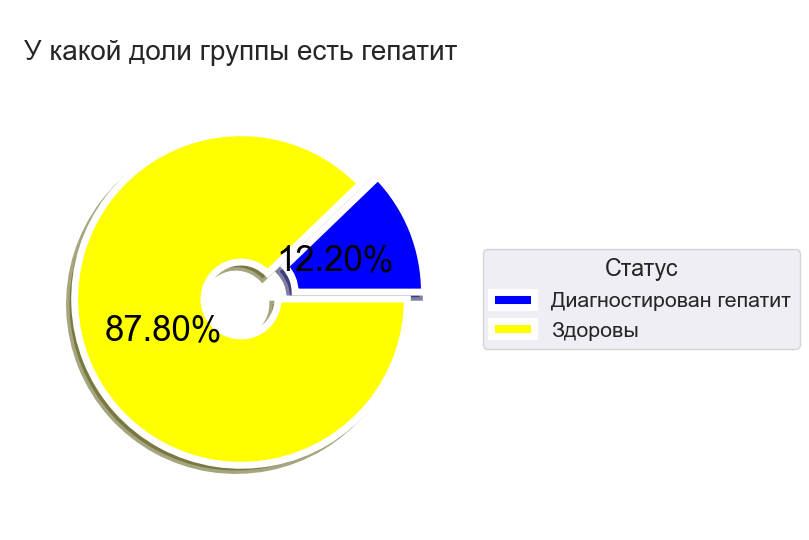

In [388]:
plt.subplots(figsize=(6, 6))

labels = "Диагностирован гепатит","Здоровы"
size = 0.7

wedges, texts, autotexts = plt.pie([len(df[df["Hep"] == 1]["Hep"]),
                                    len(df[df["Hep"]== 0]["Hep"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["blue","yellow"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Статус",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nУ какой доли группы есть гепатит",fontsize=20)
plt.show()

Рассмотрим, как больные гепатитом распределены по полу.

In [318]:
df_hep = df[df["Hep"] == 1]
df_hep.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,f,m,0=Blood Donor,0s=suspect Blood Donor,Hep
540,38,45.0,56.3,23.0,33.1,7.0,9.58,6.00,77.9,23.3,63.0,0,1,0,0,1
541,19,41.0,66.2,87.0,67.0,12.0,7.55,5.30,62.0,65.0,75.0,0,1,0,0,1
542,23,47.0,66.2,38.9,164.2,17.0,7.09,5.30,79.3,90.4,70.1,0,1,0,0,1
543,25,42.0,66.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5,0,1,0,0,1
544,27,45.0,66.2,23.0,37.8,10.0,8.77,5.30,55.2,35.9,74.5,0,1,0,0,1


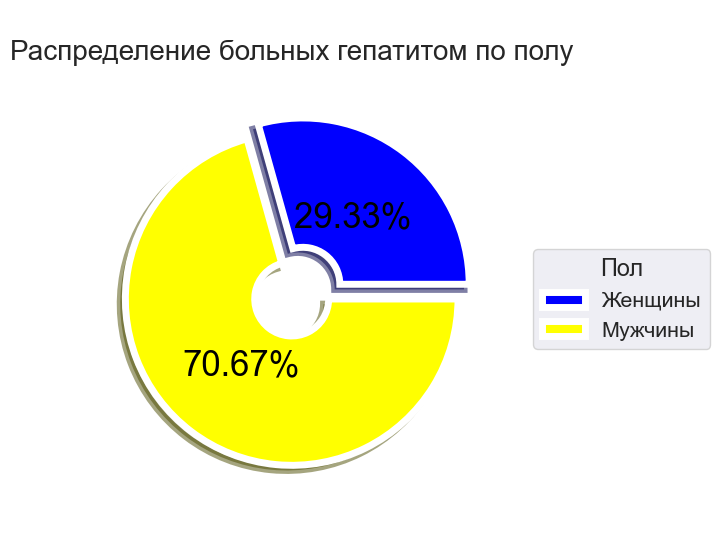

In [319]:
plt.subplots(figsize=(6, 6))

labels = "Женщины","Мужчины"
size = 0.7

wedges, texts, autotexts = plt.pie([len(df_hep[df_hep["f"] == 1]["f"]),
                                    len(df_hep[df_hep["m"]== 1]["m"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["blue","yellow"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Пол",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nРаспределение больных гепатитом по полу",fontsize=20)
plt.show()

# Рассмотрим численные показатели

In [320]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,38.50,52.5,23.0,22.1,7.5,6.93,5.30,106.0,23.3,69.0
1,38.50,70.3,23.0,24.7,3.9,11.17,4.80,74.0,23.3,76.5
2,46.90,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,43.20,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,39.20,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...
610,32.00,66.2,23.0,110.3,50.0,5.57,6.30,55.7,23.3,68.5
611,41.95,102.8,23.0,44.4,20.0,8.26,5.30,63.0,35.9,71.3
612,41.95,87.3,23.0,99.0,48.0,8.26,5.30,66.7,64.2,82.0
613,33.00,66.2,39.0,62.0,20.0,8.26,4.20,52.0,50.0,71.0


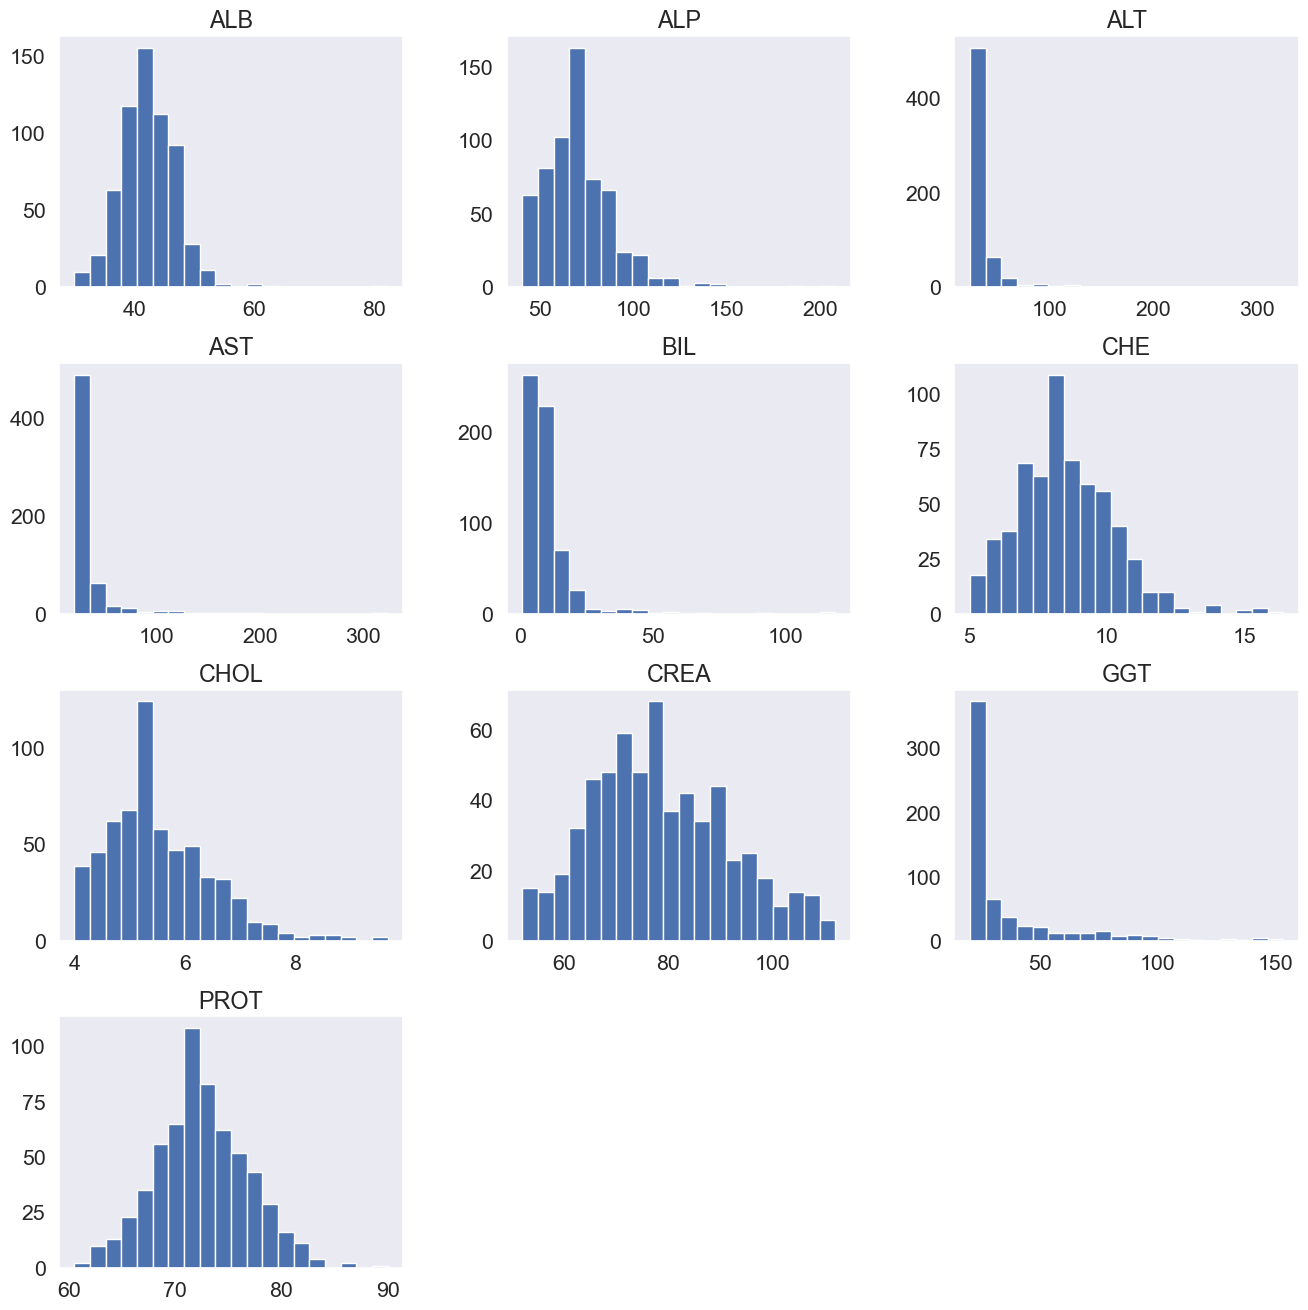

In [321]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

Боюсь, улучшить ситуацию, обрезав доплнительно, мы не сможем, поскольку у доноров с идеальным здоровьем и у гепатологических пациентов действительно такие серьезные разбросы нормальны и мы можем что-то нужное потерять.

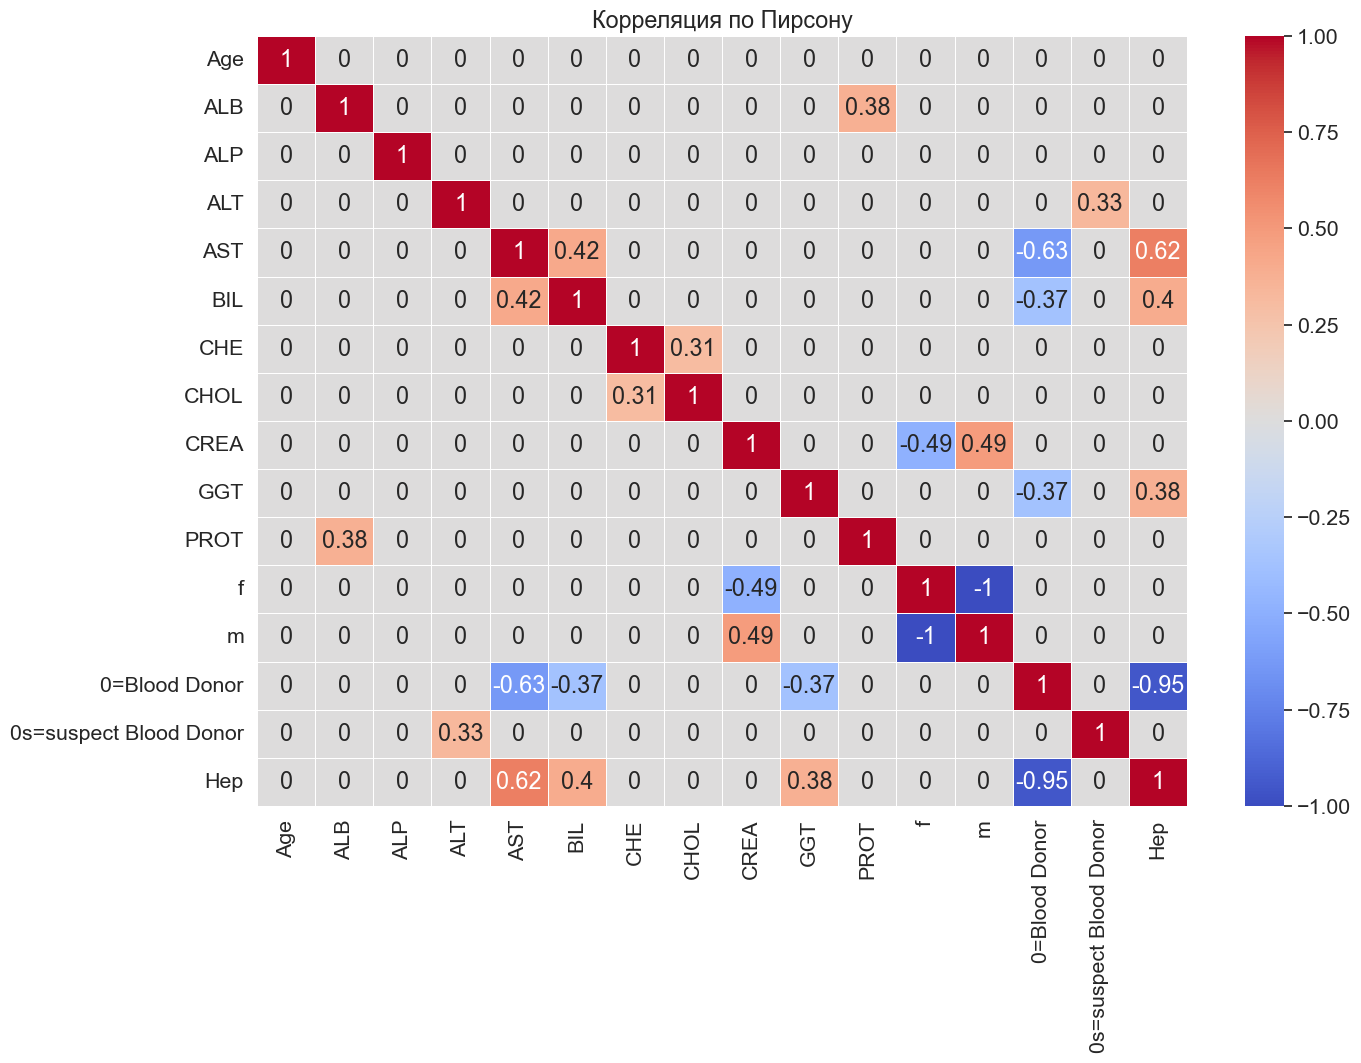

In [322]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Корреляция по Пирсону')
plt.show()

И так очевидно, что у гепатита любой формы выраженности сильнейшая отрицательная связь с донорством крови, здесь люди разных категорий. Достаточно сильная положительная связь с АСТ, умеренной силы положительная - с уровнем билирубина и ГГТ. Повышение этих показателей - действительно значимый маркер нарушений работы печени.

Из прочего. Альбумин - белок сыворотки крови, нормально, что он достаточно выраженно связан с уровнем общего белка. Донорство и уровень билирубина, донорство и ГГТ обратно связаны, это тоже логично и на практике вроде бы отслеживается. Креатинин заметно зависит пола, во многом из-за различий в мышечной массе, у мужчин на практике он выше, связи тут тоже логичные получили.

# Оставим признаки для модели, выделим целевой признак

In [323]:
df.columns.tolist()

['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT',
 'f',
 'm',
 '0=Blood Donor',
 '0s=suspect Blood Donor',
 'Hep']

In [324]:
feature_names = ['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT',
 'f',
 'm']

target_name = 'Hep'

In [325]:
df = df[feature_names + [target_name]]
df.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,f,m,Hep
0,32,38.5,52.5,23.0,22.1,7.5,6.93,5.30,106.0,23.3,69.0,0,1,0
1,32,38.5,70.3,23.0,24.7,3.9,11.17,4.80,74.0,23.3,76.5,0,1,0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1,0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1,0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1,0


# Стандартизируем признаки

In [326]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float64', 'float32', 'float16']).columns.tolist()
feature_names_for_stand

['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

In [361]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [328]:
stand_features

array([[-0.79954679, -0.9177677 , -0.38850778, ...,  2.12518254,
        -0.51931544, -0.81109114],
       [-0.79954679,  0.014114  , -0.38850778, ..., -0.30644994,
        -0.51931544,  0.90197168],
       [ 0.9892275 ,  0.24446678,  0.17291525, ...,  0.60541224,
        -0.1126359 ,  1.54151513],
       ...,
       [-0.06487163,  0.90411338, -0.38850778, ..., -0.86116611,
         1.16080508,  2.15821775],
       [-1.97076806, -0.20053291,  0.29200499, ..., -1.97819728,
         0.57748695, -0.35427439],
       [-1.33192009, -0.20053291,  2.88645992, ..., -0.83836955,
        -0.07977291, -1.03949952]])

In [329]:
stand_features.shape

(615, 10)

In [330]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [331]:
df.tail()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,f,m,Hep
610,62,-2.183717,-0.200533,-0.388508,2.282942,3.813353,-1.660161,0.813341,-1.697040,-0.519315,-0.925295,1,0,1
611,64,-0.064872,1.715583,-0.388508,0.251853,0.950405,-0.144833,-0.245742,-1.142324,-0.001723,-0.285752,1,0,1
612,64,-0.064872,0.904113,-0.388508,1.934668,3.622490,-0.144833,-0.245742,-0.861166,1.160805,2.158218,1,0,1
613,46,-1.970768,-0.200533,0.292005,0.794299,0.950405,-0.144833,-1.410732,-1.978197,0.577487,-0.354274,1,0,1
614,59,-1.331920,-0.200533,2.886460,1.349073,0.186953,0.311456,-0.245742,-0.838370,-0.079773,-1.039500,1,0,1


In [339]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=',')

# Разобьем на train / test

In [340]:
X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Логистическая регрессия

In [341]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [342]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
 
# передадим ей тестовые и прогнозные значения
model_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels = [0,1])
 
# для удобства создадим датафрейм
model_matrix_lr_df = pd.DataFrame(model_matrix_lr)
model_matrix_lr_df

,0,1
0,155,1
1,14,15


In [343]:
# проверим, сколько точно больных и здоровых в тестовой выборке (0 - здоров, 1 - болен)
y_test.value_counts(dropna=False)

0    156
1     29
Name: Hep, dtype: int64

In [344]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - здоров, 1 - гепатит
model_matrix_lr_df = pd.DataFrame(model_matrix_lr, columns = ['здоров прогноз', 'гепатит прогноз'], index = ['здоров факт', 'гепатит факт'])
model_matrix_lr_df

,здоров прогноз,гепатит прогноз
здоров факт,155,1
гепатит факт,14,15


In [345]:
round((155 + 15)/(155 + 15 + 1 + 14), 2)

0.92

In [346]:
from sklearn.metrics import accuracy_score, classification_report

lr_report = classification_report(y_test, y_pred_lr)
lr_acc = round(accuracy_score(y_test, y_pred_lr)*100, ndigits = 2)
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")


Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       156
           1       0.94      0.52      0.67        29

    accuracy                           0.92       185
   macro avg       0.93      0.76      0.81       185
weighted avg       0.92      0.92      0.91       185


The Accuracy of Logistic Regression is 91.89 %


Accuracy высокий. Но вообще мне совсем не нравится, что почти половину людей с гепатитом отнесли к прогнозируемо здоровым.

# "Дерево решений"

In [347]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=100, 
                                 min_samples_leaf=1, 
                                 random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [348]:
model_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels = [0,1])
 
model_matrix_dt_df = pd.DataFrame(model_matrix_dt)
model_matrix_dt_df

,0,1
0,152,4
1,9,20


In [349]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - здоров, 1 - гепатит
model_matrix_dt_df = pd.DataFrame(model_matrix_dt, columns = ['здоров прогноз', 'гепатит прогноз'], index = ['здоров факт', 'гепатит факт'])
model_matrix_dt_df

,здоров прогноз,гепатит прогноз
здоров факт,152,4
гепатит факт,9,20


In [350]:
round((152 + 20)/(152 + 9 + 4 + 20), 2)

0.93

Accuracy вышел еще повыше и гораздо меньше людей с гепатитом отнесено к предположительно здоровым. Модель работает лучше.

# Важность признаков

In [351]:
dt_model.feature_importances_

array([0.06197318, 0.09899713, 0.04844207, 0.03759735, 0.61958004,
       0.02455683, 0.        , 0.00730116, 0.02427149, 0.03976072,
       0.03752003, 0.        , 0.        ])

In [352]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       dt_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [353]:
feature_importances.head(3)

,feature_name,importance
4,AST,0.619580
1,ALB,0.098997
0,Age,0.061973


In [354]:
feature_importances.tail(5)

,feature_name,importance
8,CREA,0.024271
7,CHOL,0.007301
6,CHE,0.000000
11,f,0.000000
12,m,0.000000


АСТ отмечен как наиболее значимый признак. Действительно, ранее, когда мы рассматривали корреляции, то выделили именно его.

# Сохраним модель

In [386]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

In [387]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(dt_model, file)